# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr

In [2]:
# Set the maximum width in characters of a column
pd.set_option('display.max_colwidth', None)

# Set the display width to a large number to avoid wrapping
pd.set_option('display.width', 1000)

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [4]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [5]:
# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])



In [6]:
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count = study_data_complete["Mouse ID"].nunique()
mice_count

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Finding duplicate mice by "Mouse ID" and "Timepoint"
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Displaying the duplicate mice
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
# Getting unique Mouse IDs that have duplicate entries
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Creating a boolean mask where True values correspond to rows we want to keep
mask = ~study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)

# Applying the mask to exclude rows with duplicate mouse IDs
study_data_clean = study_data_complete[mask]

# Now, study_data_clean contains only the data for mice that are not duplicated
study_data_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = study_data_clean["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# mean and median
mean_tumor_volume = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Grouping by 'Drug Regimen' and calculating the variance of 'Tumor Volume (mm3)' ddof=1 for sample variance
tumor_volume_variance = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.var, ddof=1)
tumor_volume_stdev = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.std, ddof=1)

# SEM
tumor_volume_sem = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stdev,
    "Tumor Volume Std. Err.": tumor_volume_sem
 })

summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)

summary_statistics


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

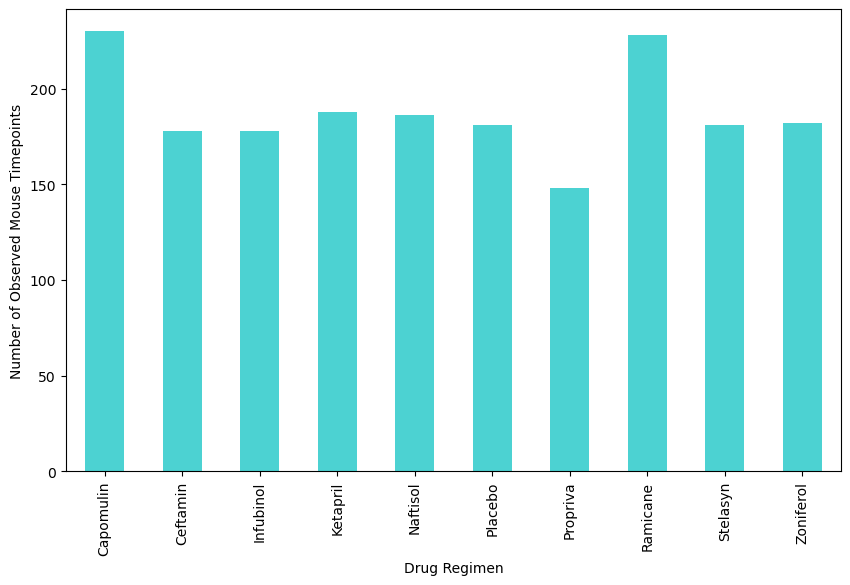

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = study_data_clean.groupby('Drug Regimen')['Mouse ID'].count()

ax = regimen_counts.plot.bar(figsize=(10, 6), color='c', alpha=0.7)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

plt.show()

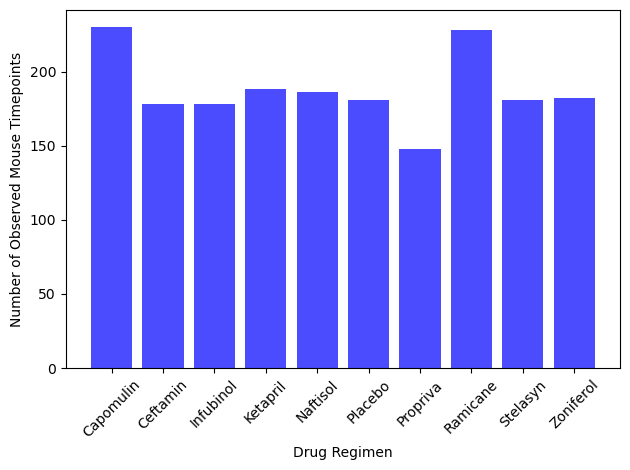

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by 'Drug Regimen' and count the number of timepoints for each
drug_counts = study_data_clean.groupby('Drug Regimen')['Mouse ID'].count()

drug_names = drug_counts.index.tolist()
timepoints_counts = drug_counts.values.tolist()

# Creating the bar plot
plt.bar(drug_names, timepoints_counts, color='b', alpha=0.7)  # Create a bar plot

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Format and show
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


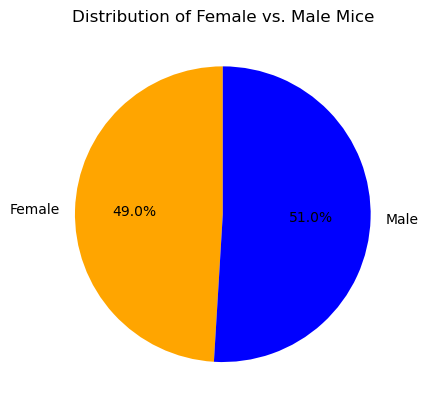

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = study_data_clean.groupby('Sex').size()


gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'], title='Distribution of Female vs. Male Mice')
plt.show()


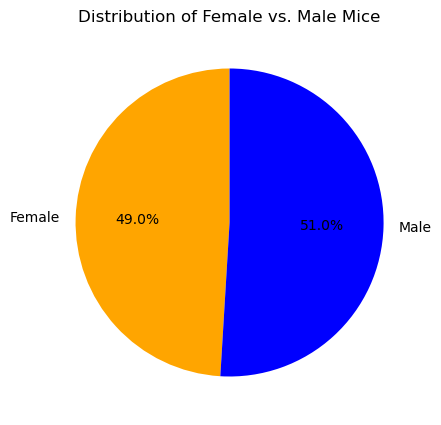

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = study_data_clean.groupby('Sex').size()

plt.figure(figsize=(5, 5))  # Set the size of the figure
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Group by 'Mouse ID' and find the maximum 'Timepoint' for each mouse
max_timepoints = study_data_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this with the original DataFrame to get the row with the maximum 'Timepoint' for each mouse
merged_data = pd.merge(max_timepoints, study_data_clean, on=['Mouse ID', 'Timepoint'], how='left')




In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for drug in treatment_list:
    # Locate the rows in the merged DataFrame which correspond to each treatment
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append these volumes to the tumor_volumes list
    tumor_volumes.append(final_tumor_volume)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers
outliers = {}
for drug, volumes in zip(treatment_list, tumor_volumes):
    quartiles = volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Find outliers
    outlier_volumes = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    outliers[drug] = outlier_volumes.values

    # Print results
    print(f"{drug} potential outliers: {outlier_volumes.values}")


Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


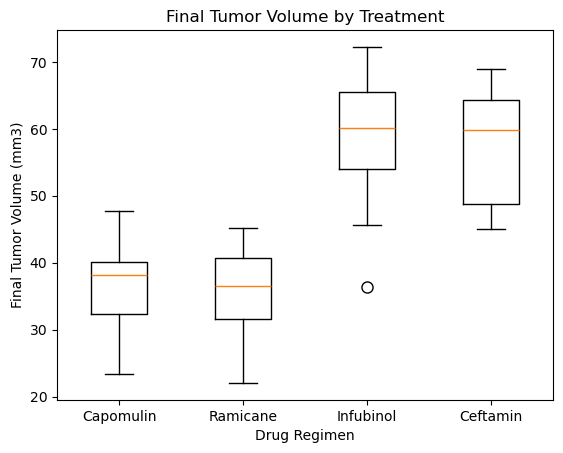

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes, flierprops=dict(marker='o', color='r', markersize=8), labels=treatment_list)

# Customize and show plot
ax.set_title('Final Tumor Volume by Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

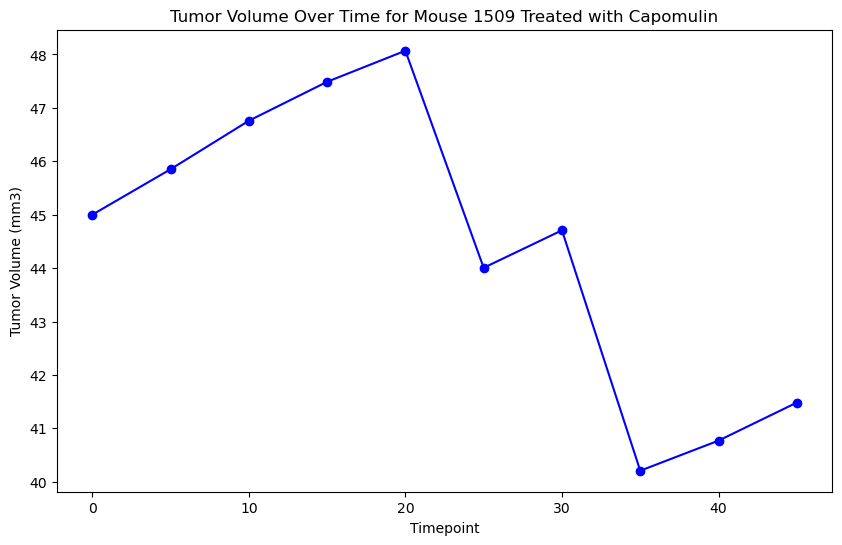

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter for Capomulin and specifically for mouse ID l509
# mouse_data = study_data_clean[(study_data_clean['Drug Regimen'] == 'Capomulin') & (study_data_clean['Mouse ID'] == 'l509')]
mouse_data = study_data_clean.loc[study_data_clean["Mouse ID"] == 'l509', ["Timepoint", "Tumor Volume (mm3)"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title("Tumor Volume Over Time for Mouse 1509 Treated with Capomulin")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()


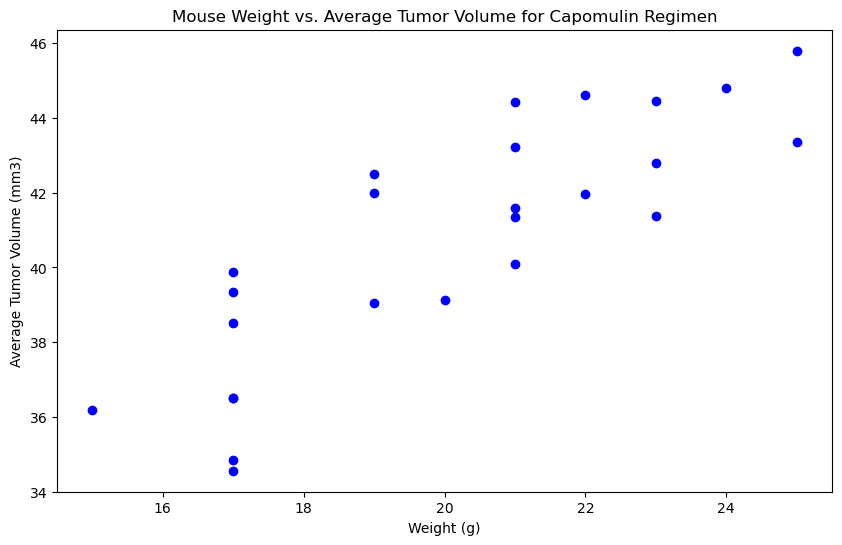

In [22]:
# Step 1: Filter the data for the Capomulin regimen
capomulin_data = study_data_clean[study_data_clean['Drug Regimen'] == 'Capomulin']

# Step 2: Group data by Mouse ID and calculate the average tumor volume
mouse_grouped = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',   # Calculate the average tumor volume
    'Weight (g)': 'mean'            # Get the average weight (should be constant)
})

# Step 3: Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_grouped['Weight (g)'], mouse_grouped['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()


The correlation coefficient between mouse weight and average tumor volume is 0.84
Linear regression equation: y = 0.95x + 21.55


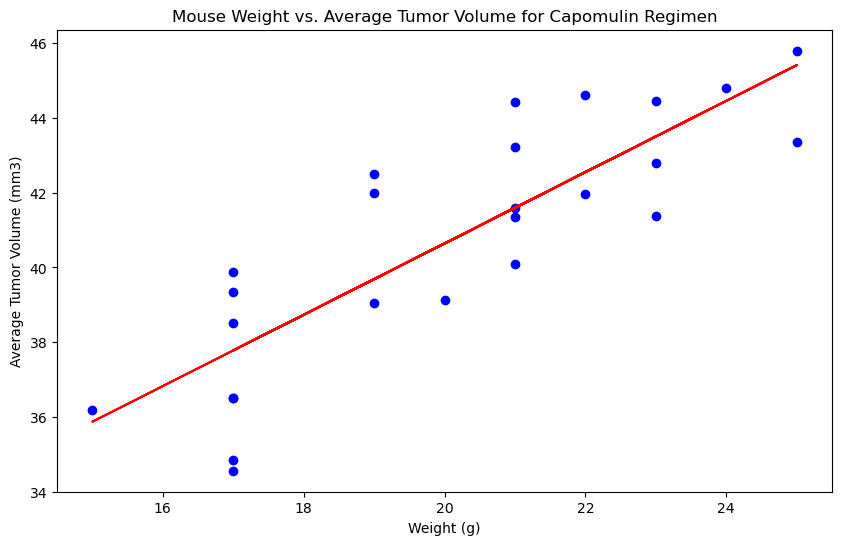

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = pearsonr(mouse_grouped['Weight (g)'], mouse_grouped['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_grouped['Weight (g)'], mouse_grouped['Tumor Volume (mm3)'])
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")

# Create the scatter plot and add the regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_grouped['Weight (g)'], mouse_grouped['Tumor Volume (mm3)'], color='blue')
plt.plot(mouse_grouped['Weight (g)'], intercept + slope * mouse_grouped['Weight (g)'], 'r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()
